In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X ,y  = make_blobs(n_samples=100,n_features=2, centers=2, cluster_std=4, random_state=42 )

In [5]:
X.shape

(100, 2)

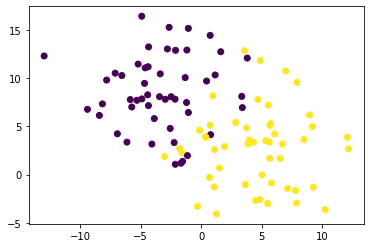

In [6]:
plt.scatter(X.T[0],X.T[1], c=y)

## Scale etmeden yola devam edelim

In [7]:
X *= [1,1000] 
# X[:,0] = X[:,0] * 1000
# X[:, 1] = X[:,1] * 0.5

In [8]:
X[0]

array([-4.42589457e+00,  8.27165022e+03])

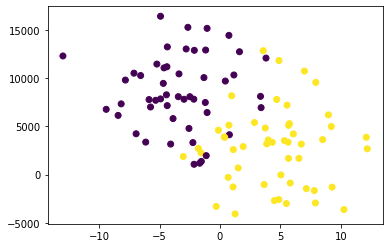

In [9]:
plt.scatter(X.T[0],X.T[1], c=y)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [12]:
model = KNeighborsClassifier()

In [13]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
model.score(X_train, y_train)

0.7866666666666666

In [15]:
y_pred = model.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[ 8,  3],
       [ 1, 13]])

In [17]:
model.score(X_test, y_test )

0.84

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.81      0.93      0.87        14

    accuracy                           0.84        25
   macro avg       0.85      0.83      0.83        25
weighted avg       0.85      0.84      0.84        25



## Scale ederek kontrol edelim

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [21]:
X_test_sc = sc.transform(X_test)

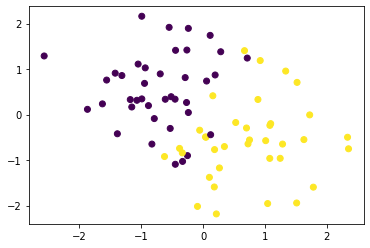

In [22]:
plt.scatter(X_train_sc.T[0], X_train_sc.T[1], c=y_train)

In [23]:
model.fit(X_train_sc, y_train)

KNeighborsClassifier()

In [24]:
model.score(X_train_sc, y_train)

0.9333333333333333

In [25]:
model.score(X_test_sc, y_test)

0.88

In [26]:
y_pred_sc = model.predict(X_test_sc)

In [27]:
print(classification_report(y_test, y_pred_sc)) # scale edilmiş report

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.82      1.00      0.90        14

    accuracy                           0.88        25
   macro avg       0.91      0.86      0.87        25
weighted avg       0.90      0.88      0.88        25



In [28]:
print(classification_report(y_test, y_pred)) # scale edilmemiş report

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.81      0.93      0.87        14

    accuracy                           0.84        25
   macro avg       0.85      0.83      0.83        25
weighted avg       0.85      0.84      0.84        25



* Scale ettikten sonra skorlarda iyileşme görüldü
* Buradan çıkarılacak sonuç, KNN için scaling faydalı

## Yeni bir model kuralım ve k değeri araştıralım

In [29]:
from sklearn.model_selection import cross_validate

In [30]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=42, cluster_std=5)

In [31]:
k_degerler = list(range(1,40))
train= []
test = []

for k in k_degerler:
    model = KNeighborsClassifier(n_neighbors=k)
    cv = cross_validate(estimator=model, X=X, y=y, cv=10, return_train_score=True, n_jobs=-1)
    train.append(cv["train_score"].mean())
    test.append(cv["test_score"].mean())

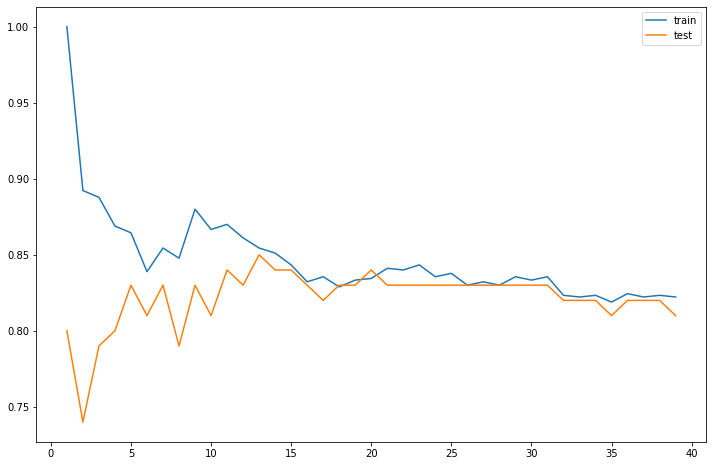

In [32]:
plt.figure(figsize=(12,8))
plt.plot(k_degerler, train, label="train")
plt.plot(k_degerler, test, label="test")
plt.legend()


* Grafiği inceledik
* Train ve test scorunun olabilen en yüksek değerler olmasını istiyorum
* Bu kapsamda 5 ve 14ün bu değerleri sağlayabileceğini değerlendiriyorum
* Bu k değerleri için skor incelemesi yapmamda fayda mütalaa ediyorum 

In [33]:
model = KNeighborsClassifier(n_neighbors=14)
cv = cross_validate(estimator=model, X=X, y=y, cv=10, return_train_score=True)
print(cv["train_score"].mean())
print(cv["test_score"].mean())

0.8511111111111112
0.8400000000000001


In [34]:
model = KNeighborsClassifier(n_neighbors=5)
cv = cross_validate(estimator=model, X=X, y=y, cv=10, return_train_score=True)
print(cv["train_score"].mean())
print(cv["test_score"].mean())

0.8644444444444443
0.8300000000000001


In [35]:
model = KNeighborsClassifier(n_neighbors=17)
cv = cross_validate(estimator=model, X=X, y=y, cv=10, return_train_score=True)
print(cv["train_score"].mean())
print(cv["test_score"].mean())

0.8355555555555554
0.8200000000000001


In [36]:
from ipywidgets import interact

In [37]:
@interact
def knn(k=(1,40,2), weight= ["distance", "uniform"],algorithm=['auto', "brute", "ball_tree", "kd_tree"]):
    train=[]
    test=[]
    model = KNeighborsClassifier(n_neighbors=k, weights=weight, algorithm=algorithm)
    sc = StandardScaler()
    X_sc = sc.fit_transform(X)
    cv = cross_validate(estimator=model, X=X_sc, y=y, cv=10, return_train_score=True)
    train_score = cv["train_score"].mean()
    test_score = cv["test_score"].mean()
    
    display("Train_Score= ", train_score)
    display("Test_Score= ",test_score)

interactive(children=(IntSlider(value=19, description='k', max=40, min=1, step=2), Dropdown(description='weigh…

## VE son olarak karar sınırları

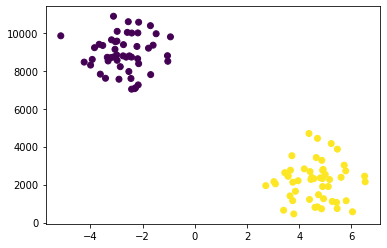

interactive(children=(Checkbox(value=True, description='olcekle'), IntSlider(value=3, description='k', max=31,…

In [38]:
from sklearn import datasets, neighbors, preprocessing, model_selection, metrics
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact

M = 100
#n_samples=100, n_features=2, centers=2, random_state=42, cluster_std=5
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)
X *= [1, 1000]

plt.scatter(X.T[0], X.T[1], c=y)

@interact(olcekle=True, k=(1,31,2), agirlik=['uniform', 'distance'], p=(1,10,1))

def olcekle(olcekle=True, k=3, agirlik='uniform', p=2):
    # Olcekleme
    if olcekle:
        X_c = preprocessing.StandardScaler().fit_transform(X)
        olc = 'Scaled'
    else:
        X_c = X.copy()
        olc = 'Unscaled'
        
    # Modelleme
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_c, y, test_size=0.25, random_state=42)
    model = neighbors.KNeighborsClassifier(n_neighbors=k, weights=agirlik, p=p)
    model.fit(X_train, y_train)
    
    print('Training score:', model.score(X_train, y_train))
    print('Test score:', model.score(X_test, y_test))
    
    # Sekil
    xx, yy = np.meshgrid(*[np.linspace(i.min() - abs(i.min())*0.1, i.max() * 1.5, 100) for i in X_c.T])    
    zz = model.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, zz, alpha=0.2)
    plt.scatter(X_test.T[0], X_test.T[1], c=y_test, label='test data')
    plt.scatter(X_train.T[0], X_train.T[1], c=y_train, alpha=0.1, edgecolors='black', label='training data')
    plt.title(f'KNeighbors Classification - k={k} , {olc}')
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
    plt.legend()
    

## Minkowski karar sınırları

In [39]:
@interact(p2=(-8,8,1))
def mink(p2=2):
    p = p2
    minp = 2**p
    print(minp)
    ii, jj = np.meshgrid(np.linspace(-3,3,1000), np.linspace(-3,3,1000))
    ds = (np.abs(ii)**(2**p) + np.abs(jj)**(2**p))**(1/2**p)
    ds[np.abs(ds - 1) > .4e-1] = 0
    plt.contourf(ii, jj, ds)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
#     plt.axis('equal')

interactive(children=(IntSlider(value=2, description='p2', max=8, min=-8), Output()), _dom_classes=('widget-in…